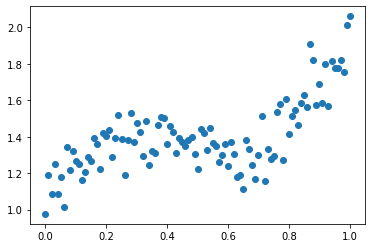

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 101)
z = 1 + 3*x -7*x**2 + 5*x**3 + 0.1*np.random.randn(len(x))
plt.scatter(x, z)
plt.show()

In [22]:
deg = 3
X = np.stack([ x**i for i in range(deg+1)], 1) # +1 because init-val
print(X[::20])

[[1.    0.    0.    0.   ]
 [1.    0.2   0.04  0.008]
 [1.    0.4   0.16  0.064]
 [1.    0.6   0.36  0.216]
 [1.    0.8   0.64  0.512]
 [1.    1.    1.    1.   ]]


# class 1d

In [27]:
class PolynomialRegression1D:
    def __init__(self, eta, deg=2):
        self.eta = eta
        self.deg = deg
    def learn(self, x, z, n_stops=1e-7, n_learns=10000):
        X = np.stack([ x**i for i in range(self.deg+1)], axis=1) # polynomialize
        self.w = np.zeros(X.shape[1])
        dw = np.zeros(X.shape[1])
        h = np.dot(X, self.w)
        self.sse = [ self.cal_sse(h,z)]
        
        for i in range(n_learns):
            eee = 2 * (z-h) * self.eta
            dw = np.dot(eee, X)
            self.w += dw
            h = np.dot(X, self.w)
            self.sse += [ self.cal_sse(h,z)]
            if (np.all(np.abs(dw)) < n_stops): break
    def predict(self, x):
        X = np.stack([ x**i for i in range(self.deg+1)], axis=1)
        return np.dot(X, self.w)
    def cal_sse(self, h, z):
        return ((z-h) ** 2).sum()

In [28]:
eta = 0.005
pR = PolynomialRegression1D(eta=eta, deg=3)
pR.learn(x, z)

In [29]:
print(pR.w)

[ 1.13537157  1.74835583 -4.44527843  3.49766179]


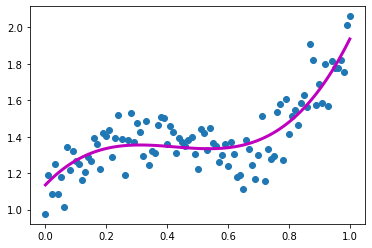

In [31]:
plt.scatter(x, z)
x = np.linspace(0, 1 , 101)
h = pR.predict(x)
plt.plot(x, h, 'm', lw=3)
plt.show()

# 2 dependent features 

In [32]:
x = np.random.uniform(0, 4, 500)
y = np.random.uniform(0, 4, 500)
z = 22 + 4*x + 7*y + x**2 + y**2 -6*x*y + np.random.randn(len(x))

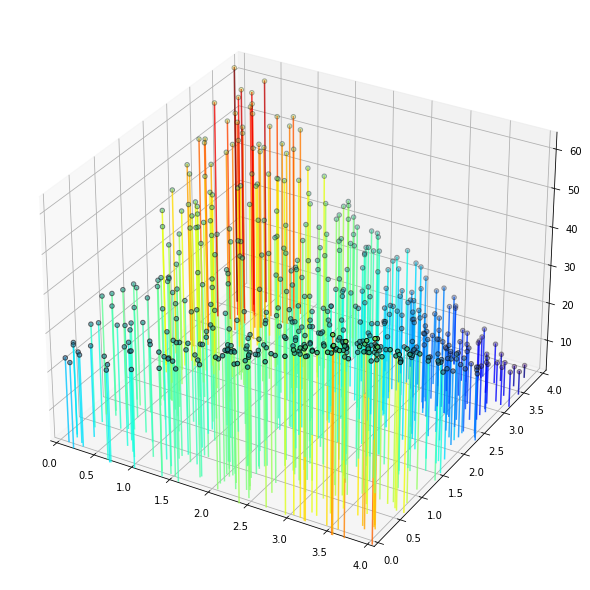

In [45]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(8,8))
ax = plt.axes([0,0,1,1], projection='3d',
             xlim=(0,4), ylim=(0,4),
                 zlim=(z.min(), z.max())
                )
for i in range(len(x)):
    ax.plot([x[i], x[i]],
           [y[i], y[i]],
           [z[i], 0], 
                alpha=.8,
           c=plt.get_cmap('jet')
            ((z[i] - z.min())/(z.max() - z.min()))) 
ax.scatter(x, y, z, c=z, edgecolor='k')
plt.show()

In [46]:
deg = 2
xy_ = np.stack(
    [ x**(k-i) * y**i for k in range(deg+1) for i in range(k+1)]
)
xy_

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 2.36553927,  2.03649707,  3.78582146, ...,  0.67334559,
         3.6452308 ,  0.21118748],
       [ 0.17636564,  1.66131741,  2.96940931, ...,  2.20660957,
         1.53973287,  1.0388448 ],
       [ 5.59577603,  4.14732033, 14.33244414, ...,  0.45339429,
        13.28770758,  0.04460015],
       [ 0.41719984,  3.38326804, 11.24165348, ...,  1.48581083,
         5.61268169,  0.21939102],
       [ 0.03110484,  2.75997554,  8.81739163, ...,  4.86912579,
         2.37077732,  1.07919852]])

# use sklearn **Polynomial Features**

In [54]:
from sklearn.preprocessing import PolynomialFeatures as pf
deg = 2
xy = np.stack([x, y], 1)
xy_ = pf(deg).fit_transform(xy)
xy_[0]

array([1.        , 2.36553927, 0.17636564, 5.59577603, 0.41719984,
       0.03110484])

In [55]:
# deg 1 : 1, x, y, xy
# deg 2 : 1, x, y, x^2, y^2, xy

### What is has 3 features $x,y,z$ it will surely mess up!
deg 1 : 1, x, y, z, xy, xz, yz
<br />
deg 2 : 1, x, y, z, x^2, y^2, z^2, xy, xz, yz, xyz

In [57]:
n = 3
x1 = np.linspace(0, 2, n)
x2 = np.linspace(0, 3, n)
x3 = np.linspace(0, 5, n)
print(pf(degree=2).fit_transform(np.stack([x1,x2,x3], axis=1)))

[[ 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 1.    1.    1.5   2.5   1.    1.5   2.5   2.25  3.75  6.25]
 [ 1.    2.    3.    5.    4.    6.   10.    9.   15.   25.  ]]


In [63]:
class PolynomialRegression:
    def __init__(self, eta, deg=2):
        self.eta = eta
        self.deg = deg
    def learn(self, X, z, n_stops=1e-7, n_learns=10000):
        # X = np.stack([ x**i for i in range(self.deg+1)], axis=1) # polynomialize
        X = pf(degree=self.deg).fit_transform(X)
        self.w = np.zeros(X.shape[1])
        dw = np.zeros(X.shape[1])
        h = np.dot(X, self.w)
        self.sse = [ self.cal_sse(h,z)]
        
        for i in range(n_learns):
            eee = 2 * (z-h) * self.eta
            dw = np.dot(eee, X)
            self.w += dw
            h = np.dot(X, self.w)
            self.sse += [ self.cal_sse(h,z)]
            if (np.all(np.abs(dw)) < n_stops): break
    def predict(self, x):
        # X = np.stack([ x**i for i in range(self.deg+1)], axis=1)
        X = pf().fit_transform(x)
        return np.dot(X, self.w)
    def cal_sse(self, h, z):
        return ((z-h) ** 2).sum()

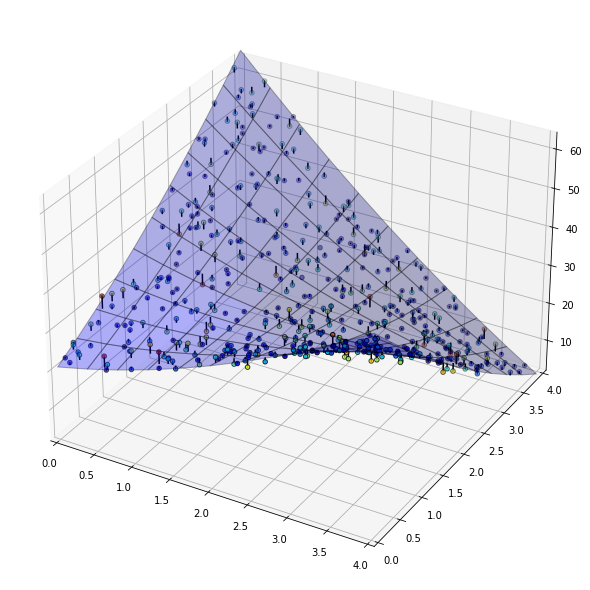

In [68]:
X = np.stack([x,y], axis=1)
eta = 0.00001
deg = 2
pR = PolynomialRegression(eta, deg)
pR.learn(X, z)

plt.figure(figsize=(8,8))
ax = plt.axes([0,0,1,1], projection='3d',
             xlim=(0,4), ylim=(0,4),
                 zlim=(z.min(), z.max())
                )
mx, my = np.meshgrid(np.linspace(0,4,11), 
                    np.linspace(0,4,11))
mX = np.stack([mx.ravel(), my.ravel()], axis=1)
mz = pR.predict(mX).reshape(11,11)
ax.plot_surface(mx, my, mz, rstride=1, 
               cstride=1, alpha=0.3, color='b',
               edgecolor='k')

h = pR.predict(X)
for i in range(len(z)):
    ax.plot([x[i], x[i]],
           [y[i], y[i]],
           [h[i], z[i] ], 
            'k')
ax.scatter(x, y, z, c=np.abs(z-h), edgecolor='k', cmap='jet')
plt.show()